## File and Data Field Descriptions
* ```train.csv``` - Personal records for about two-thirds (~8700) of the pas sengers, to be used as training data.
  * ```PassengerId``` - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
  * ```HomePlanet``` - The planet the passenger departed from, typically their planet of permanent residence.
  * ```CryoSleep``` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
  * ```Cabin``` - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
  * ```Destination``` - The planet the passenger will be debarking to.
  * ```Age``` - The age of the passenger.
  * ```VIP``` - Whether the passenger has paid for special VIP service during the voyage.
  * ```RoomService```, ```FoodCourt```, ```ShoppingMall```, ```Spa```, ```VRDeck``` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
  * ```Name``` - The first and last names of the passenger.
  * ```Transported``` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
  * ```test.csv``` - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
  * ```sample_submission.csv``` - A submission file in the correct format.
  * ```PassengerId``` - Id for each passenger in the test set.
  * ```Transported``` - The target. For each passenger, predict either True or False.

In [3]:
!pip install kaggle

Keyring is skipped due to an exception: 'keyring.backends'
  Using cached kaggle-1.5.12-py3-none-any.whl
  Using cached python_slugify-7.0.0-py2.py3-none-any.whl (9.4 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)


In [5]:
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
!echo "{\"username\":\"ahmedkmetwally\",\"key\":\"5c92b843c4f5a283aeb3a689c2c99106\"}" > /root/.kaggle/kaggle.json

In [1]:
# All the necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

from src.data_download import download_data, unzip_data
from src.data_cleaning import DataFrameImputation, ColumnSplitter

In [2]:
download_data("spaceship-titanic", "/root/.kaggle/kaggle.json")
unzip_data("spaceship-titanic", "/root/spacship-competition/data/raw")

In [3]:
# Read the CSV file and store it in a dataframe 
df_train=pd.read_csv('/root/spacship-competition/data/raw/train.csv')

In [4]:
# Print the first five rows of the DataFrame
df_train.shape

(8693, 14)

In [6]:
splitter = ColumnSplitter(df=df_train, column='Cabin', sep='/')

In [7]:
splitter.split_column(ordered_required_columns=['deck', 'num', 'side'])

In [8]:
transformer = DataFrameImputation(df_train)
transformer.impute_numeric_columns()
transformer.impute_string_columns()

In [9]:
transformer.extract_features(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'deck', 'num', 'side'])

In [10]:
transformer.df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,F,1,S


In [11]:
transformer.df.isnull().mean()

PassengerId     0.0
HomePlanet      0.0
CryoSleep       0.0
Destination     0.0
Age             0.0
VIP             0.0
RoomService     0.0
FoodCourt       0.0
ShoppingMall    0.0
Spa             0.0
VRDeck          0.0
Name            0.0
deck            0.0
num             0.0
side            0.0
dtype: float64

In [12]:
# Print a summary of the statistical properties of each numeric column
transformer.df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000,7559.000000
mean,28.845786,221.390754,464.825410,176.989546,308.931573,305.228643
std,14.333877,631.582596,1626.531078,561.472975,1117.335557,1116.902994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,80.000000,122.000000,47.000000,92.000000,74.500000
max,79.000000,9920.000000,29813.000000,12253.000000,22408.000000,20336.000000


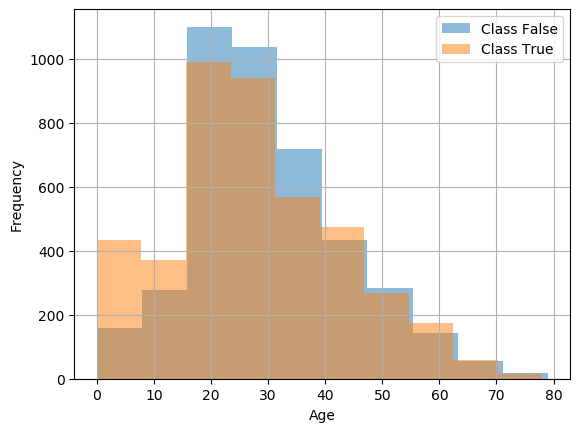

In [19]:
# The below code will create a histogram showing the distribution of the attribute_name attribute for each class in the target attribute.

# Select the attribute to visualize
attribute = 'Age'

# Create a histogram of the attribute for each class
df_train[df_train['Transported'] == False][attribute].hist(alpha=0.5, label='Class False')
df_train[df_train['Transported'] == True][attribute].hist(alpha=0.5, label='Class True')

# Add a legend and label the axes
plt.legend()
plt.xlabel(attribute)
plt.ylabel('Frequency')

# Show the plot
plt.show()

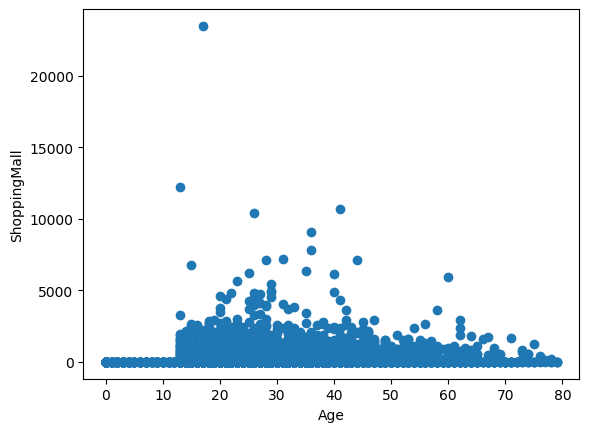

In [20]:
# Select the attributes to visualize
x_attribute = 'Age'
y_attribute = 'ShoppingMall'

# Create a scatter plot of the attributes
plt.scatter(df_train[x_attribute], df_train[y_attribute])

# Label the axes
plt.xlabel(x_attribute)
plt.ylabel(y_attribute)

# Show the plot
plt.show()

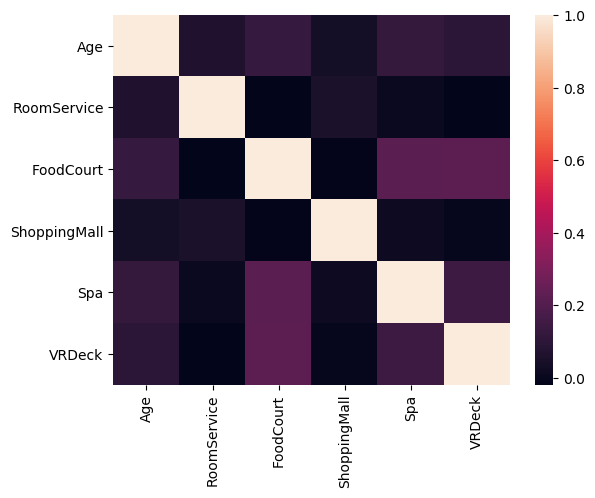

In [20]:
# Compute the correlation matrix
corr = transformer.df.corr()

# Create a heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

# Show the plot
plt.show()

#### Clean and preprocess the data: Next is cleaning and preprocessing the data to prepare it for analysis. This may include handling missing or null values, converting data types, and scaling numeric attributes.

* Handling missing or null values
* Converting data types
* Scaling numeric attributes

##### When the attributes have very different ranges of values, this can lead to some attributes dominating the model, since their values will be much larger than the values of other attributes.
##### So in this step, it is required to do the following:
* Select the numerical attributes
* Fillin the nulls
* Standardize the range and distribution of numeric attributes if applicable.

In [72]:
# Select all numeric columns
numeric_df = df_train.select_dtypes(include=['float', 'int'])

In [73]:
numeric_df.isnull().sum()

Age             179
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
dtype: int64

In [50]:
# Calculate the percentage of null values for each column

# The mean function is then used to calculate the mean of the boolean mask, 
# which returns the percentage of null values in the DataFrame or Series. 
# Since the boolean mask only contains True and False values, 
# the mean will be the percentage of True values, which is equivalent to the percentage of null values.
null_percentages = df_train.isnull().mean()

# Print the null percentages
print(null_percentages)

PassengerId     0.000000
HomePlanet      0.023122
CryoSleep       0.024963
Cabin           0.022892
Destination     0.020936
Age             0.020591
VIP             0.023352
RoomService     0.020821
FoodCourt       0.021051
ShoppingMall    0.023927
Spa             0.021051
VRDeck          0.021627
Name            0.023007
Transported     0.000000
deck            0.022892
num             0.022892
side            0.022892
dtype: float64


In [65]:
# Group the data by the VIP attribute with null values and count the number of null values for each group
null_counts = df_train.groupby(['HomePlanet']).apply(lambda x: x.isnull().mean())
# Print the null counts 
print(null_counts)

            PassengerId  HomePlanet  CryoSleep     Cabin  Destination  \
HomePlanet                                                              
Earth               0.0         0.0   0.024772  0.020643     0.021512   
Europa              0.0         0.0   0.027217  0.028625     0.017363   
Mars                0.0         0.0   0.024446  0.021035     0.023877   

                 Age       VIP  RoomService  FoodCourt  ShoppingMall  \
HomePlanet                                                             
Earth       0.019122  0.024989     0.022382   0.021078      0.024337   
Europa      0.021586  0.019709     0.016893   0.021586      0.024871   
Mars        0.024446  0.024446     0.020466   0.021603      0.020466   

                 Spa    VRDeck      Name  Transported      deck       num  \
HomePlanet                                                                  
Earth       0.021512  0.024120  0.023033          0.0  0.020643  0.020643   
Europa      0.021117  0.017363  0.021586  

In [67]:
# Group the data by the VIP attribute with null values and count the number of null values for each group
null_counts = df_train.groupby(['VIP']).apply(lambda x: x.isnull().mean())
# Print the null counts
print(null_counts)

       PassengerId  HomePlanet  CryoSleep     Cabin  Destination       Age  \
VIP                                                                          
False          0.0    0.023278   0.024967  0.022555     0.021228  0.020745   
True           0.0    0.025126   0.015075  0.030151     0.010050  0.005025   

       VIP  RoomService  FoodCourt  ShoppingMall      Spa    VRDeck      Name  \
VIP                                                                             
False  0.0     0.020866   0.020866      0.024002  0.02159  0.022072  0.023640   
True   0.0     0.020101   0.030151      0.025126  0.01005  0.020101  0.015075   

       Transported      deck       num      side  
VIP                                               
False          0.0  0.022555  0.022555  0.022555  
True           0.0  0.030151  0.030151  0.030151  


#### The null values are evenly distributed throughout the dataset, then dropping the rows may not have a significant impact on the overall distribution of the data.

#### Data Imputing numeric attributes with mean

In [74]:
# Impute null values with the mean value of the column
imputed_numeric_df = numeric_df.fillna(numeric_df.mean())

In [76]:
numeric_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [75]:
imputed_numeric_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [78]:
df_train[df_train.select_dtypes(include=['float', 'int']).columns] = imputed_numeric_df

In [83]:
df_train.groupby(['HomePlanet']).apply(lambda x: x.isnull().mean())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
HomePlanet,,,,,,,,,,,,,,,,,
Earth,0.0,0.0,0.024772,0.020643,0.021512,0.0,0.024989,0.0,0.0,0.0,0.0,0.0,0.023033,0.0,0.020643,0.020643,0.020643
Europa,0.0,0.0,0.027217,0.028625,0.017363,0.0,0.019709,0.0,0.0,0.0,0.0,0.0,0.021586,0.0,0.028625,0.028625,0.028625
Mars,0.0,0.0,0.024446,0.021035,0.023877,0.0,0.024446,0.0,0.0,0.0,0.0,0.0,0.023309,0.0,0.021035,0.021035,0.021035


#### Imputing string-like attributes (i.e., attributes with a data type of object or string)

In [84]:
# Drop rows with any null values 
df_train = df_train.dropna()

In [85]:
df_train.groupby(['HomePlanet']).apply(lambda x: x.isnull().mean())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,deck,num,side
HomePlanet,,,,,,,,,,,,,,,,,
Earth,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Europa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Mars,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [87]:
df_train = df_train.drop(columns='Cabin')

In [88]:
df_train.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported', 'deck', 'num', 'side'],
      dtype='object')

* ```test.csv``` - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.

In [90]:
df_test=pd.read_csv('Data/test.csv')

In [91]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [100]:
# Do the same attribute transformation on the test set
df_test[['deck', 'num', 'side']] = df_test['Cabin'].str.split('/', expand=True)

In [102]:
df_test = df_test.drop(columns='Cabin')

In [110]:
numeric_df_test = df_train.select_dtypes(include=['float', 'int'])
numeric_df_test.fillna(numeric_df.mean())
imputed_numeric_df_test = numeric_df.fillna(numeric_df_test.mean())
df_test[df_test.select_dtypes(include=['float', 'int']).columns] = imputed_numeric_df_test
df_test = df_test.dropna()

The performance of a machine learning model is required and the test set does not include the target variable that you want to predict.

One approach could be taken is to split the training set further into a new training set and a validation set. Then use the new training set to fit the model and the validation set to evaluate its performance. This way, it is possible to have a set of known true labels (the target variable in the validation set) that can be used to compare with the predicted labels produced by your model.

Another option would be to use a different evaluation metric that does not require true labels for the test set. For example, using a metric like mean squared error (MSE) or root mean squared error (RMSE) to evaluate the performance of the model. These metrics measure the difference between the predicted values and the true values, so they do not require the true labels to be known.

It's also worth noting that in real-world situations, it is not uncommon for the test set to not include the target variable. In these cases, it is essential to use an evaluation metric that does not require the true labels to be known.

The RMSE is a more commonly used metric than the MSE, especially in the field of statistics. It is often used in conjunction with other evaluation metrics, such as the mean absolute error (MAE) or the R-squared value, to provide a more comprehensive evaluation of a model's performance.

In [111]:
# Extract the desired features from the training set
X_train = df_train[['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'deck', 'num', 'side']].values
y_train = df_train['Transported'].values

X_test = df_test[['PassengerId', 'HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'deck', 'num', 'side']].values

In [112]:
from sklearn.preprocessing import OneHotEncoder

# Create an encoder
encoder = OneHotEncoder()

# Encode the categorical variables in the training set
X_train_encoded = encoder.fit_transform(X_train)

# Encode the categorical variables in the test set
X_test_encoded = encoder.transform(X_test)

ValueError: Found unknown categories ['2151_01', '6543_01', '4747_02', '5966_01', '5043_01', '1418_01', '7674_01', '2146_01', '6231_01', '3153_01', '6401_02', '0040_02', '6484_01', '7593_01', '3414_01', '0349_03', '8697_01', '0666_01', '7893_04', '8738_01', '4566_01', '7319_01', '6097_01', '7893_05', '5841_02', '7798_02', '5675_01', '0613_01', '4190_01', '0862_01', '1135_03', '0748_01', '2425_03', '3740_01', '7231_01', '4872_01', '2378_02', '3493_01', '2610_01', '2889_01', '1194_01', '6342_01', '9263_01', '7558_01', '0943_01', '1629_02', '6516_02', '2603_01', '7759_01', '5096_02', '4935_02', '7980_01', '5775_01', '3551_01', '6195_01', '5155_01', '0858_01', '4771_01', '6819_01', '8568_01', '8450_01', '3008_05', '3637_01', '2895_01', '2898_02', '3411_01', '4228_01', '0584_01', '1517_01', '2493_01', '3782_01', '6037_01', '8990_01', '8358_01', '3989_01', '0467_02', '4861_01', '0344_01', '2632_01', '8350_01', '9025_02', '2808_01', '5873_03', '4551_03', '8181_01', '4541_01', '5936_02', '0716_01', '8011_01', '5872_01', '3156_01', '5997_02', '2157_01', '6579_01', '0804_01', '5547_01', '3900_01', '7900_01', '3746_02', '0483_02', '7898_01', '3683_01', '9002_01', '4385_01', '2567_02', '7794_01', '7172_01', '8283_01', '1838_01', '3685_01', '5329_02', '7426_02', '0032_02', '0884_01', '5635_01', '6056_01', '8803_01', '0236_01', '3727_01', '1789_01', '7386_01', '1448_01', '6714_01', '6212_01', '0708_02', '6700_01', '3580_01', '3829_01', '4582_02', '3448_01', '3494_01', '3345_03', '0530_02', '5664_01', '1518_01', '2775_01', '5134_01', '4279_01', '3069_01', '3507_01', '2621_01', '6807_02', '6819_03', '7927_03', '4385_03', '6909_01', '3466_01', '4812_01', '8278_01', '6142_01', '3646_02', '6723_01', '2213_01', '3411_03', '8777_01', '8793_01', '9090_01', '9117_01', '0467_03', '0625_03', '5143_01', '2922_01', '2330_01', '4556_01', '1477_01', '3901_01', '9210_01', '5149_01', '0296_01', '4527_01', '3094_01', '0584_02', '1683_01', '7874_02', '0717_05', '8478_02', '8924_01', '3601_01', '5043_02', '1422_03', '5665_01', '1986_01', '3746_04', '2989_01', '6332_02', '3590_01', '0089_01', '0855_01', '1104_01', '3587_01', '1257_04', '1707_01', '5873_01', '4419_02', '6312_02', '1189_01', '7978_01', '1726_03', '3975_01', '9153_01', '8391_01', '6410_01', '7426_03', '8529_01', '5041_01', '2248_01', '6193_03', '0093_01', '6986_07', '0214_02', '3825_01', '1409_01', '8565_01', '6005_01', '7243_02', '4988_01', '5306_01', '7434_01', '6445_01', '2923_01', '3154_01', '9238_07', '3632_01', '0228_01', '2468_01', '6959_01', '7619_01', '5683_01', '3837_01', '5370_01', '8800_03', '8909_01', '8047_01', '7570_02', '8748_02', '7414_01', '2586_01', '1470_01', '0717_04', '0168_01', '1675_01', '2600_01', '7911_01', '8666_01', '5261_01', '1354_02', '6636_01', '3718_01', '2816_01', '2696_01', '3908_01', '8591_01', '2101_02', '3374_01', '2425_01', '3876_01', '7163_01', '1839_01', '1151_01', '5183_01', '4614_01', '1131_01', '2035_02', '2914_01', '5715_02', '6923_01', '1791_02', '8676_01', '2570_01', '0763_01', '6852_01', '1346_01', '7158_01', '6771_01', '2665_01', '9105_01', '3982_01', '2967_01', '0624_01', '3354_01', '4799_03', '8692_02', '0722_01', '1183_01', '7745_01', '1870_01', '0742_02', '7827_01', '2921_01', '8971_01', '3101_01', '0774_03', '2450_01', '6938_01', '0497_01', '1341_03', '5078_01', '6689_01', '8359_01', '4353_01', '3604_01', '8408_02', '9091_01', '5482_01', '1137_02', '3245_01', '8649_01', '8758_02', '0958_01', '1321_02', '0473_01', '3833_01', '8917_01', '8778_02', '3398_01', '9262_01', '2322_01', '7315_01', '7266_03', '7971_02', '1744_01', '8648_03', '3137_01', '8113_02', '5787_02', '4041_01', '2536_01', '3524_01', '0496_01', '8497_01', '8351_01', '8402_01', '8953_01', '0508_01', '7185_01', '2681_01', '6852_02', '6165_01', '0554_01', '2563_01', '4525_01', '1321_04', '4947_01', '1587_02', '7129_01', '8400_03', '8927_01', '0247_01', '7896_01', '8788_01', '8510_01', '3905_01', '4761_02', '1128_01', '5448_01', '3129_01', '4735_01', '6537_01', '7264_01', '1487_02', '2656_01', '4236_02', '8293_01', '5113_01', '5870_01', '5567_01', '8534_03', '1852_02', '0422_01', '2078_01', '4740_01', '3656_01', '5232_01', '2997_03', '2276_02', '0747_01', '1272_01', '7685_01', '8980_04', '1482_01', '5562_02', '6986_08', '1070_01', '2072_02', '2176_01', '0414_01', '6410_02', '3858_03', '1111_02', '8553_01', '4707_01', '2639_01', '1072_08', '1965_01', '6838_03', '3601_02', '0094_01', '5391_01', '4781_01', '5317_01', '7454_01', '1641_01', '1469_02', '2947_01', '0230_01', '1480_01', '2673_01', '1790_02', '1629_01', '2068_04', '8662_01', '4380_01', '1852_03', '8146_01', '2776_01', '6267_04', '6809_01', '1118_05', '3865_01', '3925_01', '6704_01', '1092_01', '2733_01', '0194_02', '8033_01', '5620_01', '5099_01', '3659_07', '5001_01', '8873_03', '4226_01', '0018_01', '2804_01', '5579_01', '1359_01', '7489_03', '4685_01', '1338_02', '3876_02', '5841_01', '2068_02', '4994_01', '7528_02', '3513_01', '8980_01', '0194_03', '1343_01', '3303_01', '5405_01', '6352_01', '2328_01', '2422_02', '3500_01', '5932_01', '3601_04', '8367_01', '0745_01', '1689_01', '3265_02', '3557_01', '8527_01', '5676_01', '5929_01', '8499_01', '6333_01', '8357_02', '9166_01', '0079_01', '0662_01', '6884_01', '8400_01', '4715_01', '2482_01', '4073_01', '1456_01', '5731_02', '8895_02', '8245_01', '6559_02', '3601_06', '4583_03', '3267_01', '9093_01', '8296_01', '1202_01', '1227_01', '2350_03', '4007_01', '4959_01', '8440_02', '0759_01', '1648_01', '5982_01', '1319_02', '3601_05', '7081_02', '8044_01', '3695_01', '7384_01', '7497_01', '8286_01', '8951_01', '0271_01', '7838_01', '2146_02', '4119_01', '0934_01', '7963_01', '2612_01', '5961_02', '3844_01', '2068_01', '0744_01', '5054_01', '3593_01', '0117_01', '3659_02', '6705_01', '5107_01', '4800_01', '7672_01', '8949_01', '3902_01', '0292_01', '1422_01', '4936_01', '0339_03', '3477_01', '6287_01', '1686_01', '7254_01', '0362_01', '7201_01', '6332_08', '7287_01', '6958_01', '7345_01', '7468_01', '2459_01', '7934_01', '0176_01', '5911_03', '9155_02', '4589_01', '8074_01', '3845_01', '2757_01', '6134_01', '2351_01', '6499_06', '8768_03', '2343_02', '1394_01', '9135_01', '1200_01', '3587_02', '4015_02', '2415_01', '8009_01', '2307_03', '1502_02', '0827_01', '4087_01', '1587_01', '1122_01', '4094_02', '0909_01', '5910_01', '6377_01', '8446_01', '1369_02', '6823_01', '6732_01', '0711_01', '4094_01', '0914_01', '4200_01', '5873_02', '6074_01', '6752_01', '3249_02', '8284_01', '1090_01', '2715_02', '2918_01', '3148_02', '3460_01', '5962_01', '2119_02', '8534_04', '8847_01', '3510_01', '7532_01', '0973_01', '1471_04', '3843_01', '3333_01', '5046_01', '6384_01', '8913_03', '6811_01', '7798_01', '2216_01', '2393_01', '3378_01', '1793_02', '8980_03', '1824_01', '9000_01', '4162_01', '1074_01', '6581_01', '1023_01', '7966_01', '2504_01', '4288_01', '2394_02', '4675_01', '8445_03', '8713_01', '7131_01', '8110_01', '3571_01', '1473_01', '3526_01', '4745_01', '5335_03', '0621_01', '3078_03', '6009_02', '3052_01', '8185_01', '6804_01', '2749_01', '3603_01', '1893_01', '2568_01', '3720_02', '7629_01', '2980_01', '3502_01', '2487_02', '5191_01', '8747_01', '8793_05', '0363_03', '8991_01', '6364_01', '9204_01', '1145_02', '6533_01', '0353_02', '5937_01', '2344_02', '0524_01', '0054_01', '5164_01', '1751_01', '7725_01', '8718_01', '1072_04', '3178_01', '7933_01', '5081_01', '0632_02', '0981_01', '5056_02', '1109_01', '3722_01', '3934_02', '4849_01', '5833_01', '6435_01', '8531_01', '0264_01', '1472_01', '3151_01', '8215_01', '4986_01', '1583_01', '4059_02', '2037_01', '5940_01', '3828_01', '4363_01', '9040_01', '8473_01', '8443_02', '9265_01', '3139_01', '7136_01', '0652_01', '8461_01', '6933_01', '6554_01', '8547_01', '9055_01', '1207_04', '1910_02', '4722_01', '0059_01', '2170_01', '7906_01', '5293_02', '9033_01', '6491_01', '2587_01', '3906_01', '6332_01', '9005_01', '7373_02', '2108_01', '1851_01', '2265_01', '3058_01', '7329_02', '1103_01', '2247_01', '1072_01', '8455_01', '7597_07', '9212_01', '7130_07', '0125_02', '0980_01', '4455_01', '5339_02', '4826_01', '3855_01', '0774_01', '0505_01', '5429_01', '7081_01', '2422_01', '3008_03', '6875_02', '7169_01', '8505_01', '0670_01', '8526_01', '7003_01', '8305_02', '6491_02', '0601_01', '4834_01', '2710_01', '5094_01', '5285_01', '6267_06', '3078_04', '6286_02', '7704_01', '1327_01', '7781_01', '3858_02', '8193_01', '3589_07', '7409_02', '0837_02', '1777_01', '7530_02', '1042_01', '9147_01', '5283_01', '3794_01', '5100_01', '7887_01', '6257_03', '8450_02', '0235_01', '0751_01', '2543_01', '4582_01', '2383_01', '6358_01', '6888_04', '8678_02', '2169_01', '5588_01', '5371_01', '0175_05', '9133_01', '0386_01', '1334_01', '8399_01', '0155_01', '8763_03', '6877_01', '3105_01', '1553_01', '4688_01', '0276_02', '1777_02', '2249_01', '6358_02', '0755_01', '1910_01', '7441_01', '6260_02', '8445_02', '8402_02', '2777_01', '0694_01', '2101_01', '8361_01', '5439_01', '0723_01', '7245_01', '6441_01', '4481_01', '2020_01', '4012_02', '7380_02', '7923_01', '2016_02', '0042_01', '8325_01', '3153_02', '5169_01', '7539_02', '7825_03', '8325_02', '0698_01', '3411_05', '6350_01', '0654_01', '1184_01', '5011_01', '3106_01', '0055_01', '7130_06', '0625_01', '2815_02', '3989_02', '4323_03', '6845_01', '0514_01', '5936_03', '7243_05', '4133_01', '1720_01', '2351_02', '3334_01', '7998_03', '1120_01', '1835_02', '7612_02', '7701_01', '6577_01', '2761_02', '1339_01', '3763_01', '1354_04', '7591_01', '7765_01', '7054_01', '7695_01', '6682_02', '5308_02', '8065_01', '8793_03', '1652_01', '5961_01', '6627_01', '4193_01', '8960_03', '7740_02', '3234_01', '4418_01', '7329_03', '1530_01', '1358_02', '0681_01', '7610_02', '7978_02', '5318_01', '1119_01', '2828_01', '4718_01', '0999_02', '5386_01', '2976_02', '0562_02', '0929_01', '2715_01', '4519_01', '8965_01', '2283_01', '2079_02', '4598_01', '1830_01', '5393_01', '6838_02', '8742_01', '4600_02', '4551_02', '0312_01', '5071_01', '3993_01', '0886_02', '8677_03', '3316_01', '7349_01', '1251_01', '4734_01', '8104_01', '4697_01', '7855_01', '5911_01', '3231_01', '1743_01', '4578_01', '0491_01', '2904_01', '5308_03', '6965_01', '6332_04', '5734_02', '6284_01', '8713_02', '0578_01', '3884_01', '0150_02', '4406_01', '5553_02', '0268_01', '1913_03', '3689_01', '1090_02', '2976_03', '1930_01', '2068_03', '8590_01', '7825_02', '1201_01', '7467_01', '7597_04', '4687_01', '1910_04', '5862_01', '9238_06', '7857_01', '7637_03', '3943_03', '4180_01', '9155_03', '4683_02', '4894_01', '3202_01', '0158_01', '0675_01', '1929_01', '3135_01', '6872_01', '0900_01', '5349_01', '0888_02', '1751_02', '7294_01', '4051_01', '7880_02', '7846_01', '1118_04', '7213_01', '0087_01', '2623_01', '0695_01', '3621_01', '7792_05', '1314_01', '2425_06', '3549_01', '1765_01', '2240_02', '8543_07', '4226_02', '7915_03', '2868_01', '7108_01', '6812_02', '8385_01', '8543_08', '0856_01', '4323_01', '1341_01', '2583_01', '7354_06', '3037_01', '6986_01', '5798_01', '8913_02', '8008_01', '8206_01', '0864_03', '3885_01', '5473_01', '0778_02', '0843_01', '6640_01', '4314_01', '0640_01', '1518_02', '7582_03', '1546_01', '4702_02', '2842_01', '8453_01', '4931_01', '5632_01', '1139_01', '6053_01', '0479_01', '7629_02', '1894_01', '8041_01', '2037_02', '0046_03', '6389_01', '2794_03', '0131_01', '8957_01', '8756_01', '1252_01', '0142_02', '3508_02', '0268_02', '3943_01', '7795_02', '7819_01', '4523_04', '5294_01', '2355_02', '1320_01', '8958_01', '6417_01', '5914_01', '8565_03', '0063_01', '0353_01', '1064_02', '8464_01', '8665_01', '0963_01', '4523_06', '6615_01', '2694_01', '4582_04', '6161_01', '8804_04', '2794_06', '3089_01', '0708_01', '1257_01', '2350_02', '0999_01', '1951_02', '2039_03', '3676_01', '6755_01', '8525_01', '7762_01', '5807_01', '4802_02', '7557_02', '4907_01', '2372_01', '6231_02', '4248_02', '8184_01', '2343_01', '2556_01', '5043_03', '5381_01', '8101_01', '8622_01', '2507_01', '2667_05', '2728_01', '2868_02', '6986_02', '1373_01', '5306_02', '8051_02', '4703_02', '0247_02', '4164_01', '4379_01', '1241_01', '8980_06', '2654_01', '5369_02', '3717_02', '8960_01', '2815_03', '7556_04', '0467_01', '4768_01', '5203_01', '4157_01', '5630_01', '1513_01', '3618_02', '0339_01', '1722_01', '5883_01', '1432_01', '1575_01', '8450_03', '1825_02', '5357_04', '2511_01', '8305_01', '3263_01', '6955_01', '4443_01', '6286_01', '1502_03', '0648_01', '3621_02', '3368_01', '7971_01', '1257_02', '5092_01', '1837_01', '5267_03', '8439_01', '9238_02', '1913_02', '7473_01', '8496_01', '6057_01', '8228_01', '5460_01', '1069_01', '4742_01', '3344_01', '2370_01', '5549_01', '7348_02', '6807_01', '5654_01', '0605_01', '9045_01', '5964_02', '0096_01', '6491_03', '7241_01', '9255_01', '4439_02', '6160_02', '0295_01', '6198_01', '4054_01', '3920_01', '6612_06', '1224_02', '1106_02', '3589_01', '2244_01', '7792_04', '0801_01', '4760_01', '5149_02', '6288_03', '4919_01', '2653_01', '1909_02', '9238_03', '4968_01', '3321_01', '8519_01', '8013_01', '7317_01', '3623_01', '8440_01', '3281_01', '8877_02', '1074_02', '1795_01', '2014_01', '9154_01', '4859_01', '7067_03', '7750_01', '8396_01', '8262_01', '8562_01', '8747_02', '2058_01', '6752_03', '3893_01', '6678_01', '0214_01', '3780_01', '7421_01', '9162_01', '5319_01', '1124_03', '0778_01', '1464_01', '8249_01', '8100_01', '5329_01', '5895_01', '6612_01', '2469_01', '7101_02', '2394_03', '5329_03', '8715_01', '0613_02', '2383_02', '4833_01', '7272_01', '0083_01', '6936_02', '6983_02', '7066_01', '3008_06', '7570_01', '2473_01', '5332_01', '5516_01', '6878_01', '8327_01', '6551_01', '6710_01', '6589_01', '7489_01', '1571_01', '2997_02', '7243_04', '6534_01', '8304_02', '1354_03', '3618_04', '4528_01', '0652_05', '4028_01', '2850_02', '2827_01', '8980_07', '3544_01', '4468_01', '2637_03', '2830_01', '5896_01', '2868_04', '3589_02', '2079_01', '2425_04', '4583_02', '5079_01', '5678_02', '1921_02', '6830_01', '4551_01', '4984_01', '5357_02', '7726_01', '6952_01', '1840_01', '3792_01', '1741_01', '5513_01', '6566_01', '0858_02', '8240_01', '1791_01', '5789_01', '5200_01', '5607_01', '7378_01', '4811_01', '1313_01', '6989_01', '5576_01', '6515_01', '8155_01', '1570_01', '9146_02', '5958_01', '2036_02', '1016_01', '2394_01', '4681_01', '7130_03', '7489_02', '9027_01', '6074_02', '7474_01', '7718_01', '5377_01', '0626_01', '4241_01', '2987_01', '9249_01', '6267_01', '6391_02', '2761_01', '1642_01', '3049_01', '6210_01', '8061_01', '8839_02', '2242_01', '8936_01', '3659_05', '2132_01', '5131_01', '1904_01', '6499_03', '7611_01', '3072_01', '5918_01', '3007_01', '1862_03', '4705_01', '5398_01', '7519_01', '7582_05', '5911_04', '1432_02', '4703_01', '0339_04', '3059_01', '5948_01', '7765_02', '8062_01', '8353_01', '4277_01', '1680_02', '6267_03', '4421_01', '6226_01', '6278_01', '5335_04', '2227_01', '2699_01', '3764_01', '1914_01', '7998_04', '3589_05', '4949_01', '7558_02', '5621_01', '3471_01', '0735_01', '0649_01', '2307_01', '5942_01', '0760_01', '3720_03', '8632_01', '6542_01', '2896_01', '0374_01', '3809_01', '8304_01', '1183_02', '8692_01', '3860_01', '9187_02', '2428_01', '7540_01', '0937_01', '3290_01', '7799_01', '8837_01', '2246_02', '3720_01', '4495_01', '5502_01', '8304_03', '6258_01', '0273_01', '7979_01', '8558_01', '8370_02', '2109_01', '4639_06', '2447_01', '4639_03', '6678_02', '1987_01', '3829_02', '7380_04', '4425_02', '4377_03', '8372_01', '8600_01', '1172_01', '2448_02', '4057_01', '4201_01', '4614_02', '8127_01', '6387_01', '1468_01', '3144_01', '8994_02', '0046_01', '2689_01', '4307_01', '6342_02', '8160_01', '8915_01', '3503_01', '9271_01', '1473_02', '0535_01', '5588_02', '9088_01', '4086_01', '1098_01', '0367_01', '1951_01', '9065_01', '3362_02', '5049_01', '0841_01', '2874_01', '6716_01', '4639_01', '8555_01', '9053_02', '2851_01', '3880_01', '9062_01', '0421_01', '4192_01', '5505_03', '2637_02', '6715_01', '5159_02', '8114_01', '8935_01', '0419_01', '5096_01', '8648_01', '1629_06', '3264_01', '8608_01', '6379_01', '4701_04', '6496_01', '3661_01', '1301_02', '1522_01', '2292_01', '6217_01', '6269_03', '7135_03', '3603_02', '5577_02', '8113_01', '3207_01', '3477_02', '9214_01', '3173_01', '6307_01', '7433_01', '1773_01', '7975_01', '4250_01', '5797_01', '6209_02', '2946_01', '0065_01', '0191_01', '1814_01', '2434_02', '3914_01', '6836_01', '7139_01', '7150_01', '5094_02', '4202_01', '7663_01', '8198_01', '4761_03', '1801_02', '6974_01', '5753_01', '7319_02', '2276_01', '4067_01', '6983_01', '8223_01', '2490_01', '3601_03', '3148_01', '2485_01', '1059_02', '4751_01', '8245_02', '6469_01', '2667_01', '8660_01', '0037_01', '4265_01', '1629_05', '4629_01', '8364_01', '6783_01', '0033_01', '6140_01', '0364_01', '6717_01', '0029_01', '3806_01', '3208_01', '5590_01', '7404_01', '5342_01', '5593_01', '8195_01', '8099_01', '1072_03', '6233_01', '3109_01', '3965_01', '4248_01', '8426_01', '6272_01', '6083_01', '6690_01', '6044_02', '8045_01', '3953_01', '7204_01', '8425_01', '5815_02', '3452_01', '4202_02', '0273_03', '0161_01', '7931_01', '0046_02', '5417_01', '4536_01', '8040_01', '3538_01', '9162_02', '7348_03', '5284_01', '2381_01', '2946_03', '1875_01', '3813_01', '5135_01', '3881_01', '6679_01', '8507_01', '2644_01', '6651_01', '2337_01', '7138_01', '7963_02', '1842_01', '3155_01', '0532_02', '0317_01', '6688_01', '7063_01', '6555_01', '0273_02', '1970_01', '2771_01', '0349_05', '7876_01', '7383_01', '4227_01', '8689_01', '5031_02', '1137_01', '0749_01', '2916_01', '1519_01', '4749_01', '6337_01', '6644_01', '7329_01', '0349_02', '2836_01', '1363_01', '2766_01', '2103_01', '4548_01', '6499_05', '4398_01', '0184_01', '0648_02', '3918_01', '6849_01', '5215_01', '4966_01', '1477_02', '0775_05', '3581_01', '6533_02', '7439_01', '3368_02', '9067_01', '2850_01', '1341_02', '1429_01', '4582_03', '7963_03', '1159_01', '3228_01', '2002_01', '4435_02', '2963_01', '8017_01', '1296_01', '2049_01', '5542_01', '6876_01', '7758_01', '8832_01', '0558_01', '0027_01', '0049_01', '3989_03', '8875_03', '2004_01', '7965_01', '8187_01', '5189_01', '5553_01', '0838_01', '3266_01', '6740_01', '8434_01', '1788_01', '1932_01', '6021_01', '6278_02', '1343_03', '1598_02', '2181_01', '6936_01', '3656_02', '3347_01', '5513_03', '7846_02', '4070_03', '3244_03', '7325_01', '1618_01', '7706_01', '2931_01', '3522_01', '5328_01', '4138_01', '2898_01', '1072_02', '7610_01', '4139_01', '4323_04', '7064_01', '7471_02', '0775_02', '1814_02', '4029_01', '1702_01', '2293_01', '0652_04', '6190_01', '7547_01', '0443_01', '7977_01', '9086_02', '3245_02', '1814_03', '2603_02', '5672_01', '6329_01', '2794_02', '4235_01', '1349_02', '3611_01', '7998_01', '2222_01', '3516_01', '5329_07', '1073_01', '7991_02', '8188_01', '5267_01', '8916_01', '7380_03', '2517_01', '7407_01', '7312_01', '6653_01', '4304_01', '5498_02', '9045_02', '1209_01', '0775_03', '2931_02', '3355_01', '1917_01', '0731_01', '7354_01', '0060_01', '7921_01', '9096_02', '0916_01', '3746_03', '8534_01', '3696_01', '1819_01', '6890_01', '7473_02', '7582_02', '0021_01', '3098_01', '5228_01', '6767_01', '7251_01', '1318_01', '4858_01', '8179_01', '1275_01', '1437_01', '6677_01', '0896_01', '7528_03', '9054_01', '8583_01', '0109_01', '2686_01', '5382_01', '8882_01', '0484_01', '7198_01', '4639_02', '8426_02', '4153_01', '7075_01', '7825_01', '7299_01', '5317_02', '7959_01', '1693_01', '1966_01', '5114_01', '1297_01', '7163_02', '6875_03', '6129_01', '8246_01', '8960_02', '8763_02', '7476_01', '1566_01', '6969_01', '4700_01', '9022_02', '5865_01', '0272_01', '8761_01', '4839_01', '0844_01', '0100_02', '2674_02', '4234_02', '4275_01', '7281_01', '7426_01', '8337_01', '7556_01', '5893_02', '9266_01', '1205_01', '4263_01', '1249_01', '0812_01', '1492_01', '6079_01', '0622_01', '6577_03', '8048_01', '3002_01', '1145_04', '8921_01', '1388_01', '3194_01', '2420_01', '3358_01', '7150_02', '4105_01', '0950_01', '1305_01', '5219_02', '7178_01', '0142_01', '1538_01', '8132_01', '0532_01', '2294_01', '4789_01', '1934_01', '4967_01', '5364_01', '0880_02', '2484_02', '3376_01', '7076_01', '8258_01', '5904_02', '6202_01', '7733_01', '0451_01', '0238_01', '7589_01', '9044_01', '7869_01', '5564_01', '7354_04', '7997_01', '1270_01', '4582_06', '7541_03', '5399_01', '6345_01', '3712_04', '1883_01', '2937_01', '0626_02', '3086_01', '6235_01', '0666_02', '6160_01', '0280_01', '1958_01', '2525_01', '1487_01', '4554_01', '0959_01', '5759_01', '8196_01', '7651_01', '6605_02', '7653_01', '1247_01', '4701_03', '7991_04', '7938_01', '1982_01', '7383_02', '0627_01', '7772_01', '1574_01', '5830_01', '5178_01', '1909_03', '2039_02', '2245_02', '3190_01', '7638_01', '2803_01', '1329_01', '6507_01', '7602_01', '6666_01', '8933_01', '1298_01', '1266_01', '7375_01', '4217_01', '4671_02', '7779_01', '2068_05', '1605_01', '3844_02', '4855_02', '0897_02', '3056_01', '6291_01', '8361_02', '8385_03', '8778_01', '0842_01', '8196_02', '4478_01', '2246_01', '6050_01', '2448_01', '4969_02', '6460_01', '8169_01', '0864_02', '9200_01', '6272_02', '0300_01', '2355_04', '8352_01', '3388_01', '4724_01', '4025_01', '6231_03', '3366_01', '2978_01', '6217_02', '5024_04', '6476_01', '7912_01', '0121_01', '9070_02', '0492_01', '6018_01', '4727_02', '1217_02', '3345_02', '3233_01', '5498_01', '8525_02', '3877_01', '3375_01', '8792_01', '1741_02', '2033_01', '7380_01', '8532_01', '4384_01', '5024_05', '3697_01', '0652_03', '6571_01', '2615_01', '1869_01', '4639_04', '2487_01', '5766_01', '8647_01', '2166_01', '6005_05', '1007_01', '9229_01', '4705_02', '7222_01', '4647_01', '5038_02', '4619_01', '8340_02', '2742_01', '8109_01', '4488_01', '7613_01', '1125_02', '3731_01', '7153_01', '3929_01', '0104_01', '7600_01', '5033_01', '6790_01', '7243_01', '4545_01', '9143_03', '6332_03', '8632_02', '8913_01', '4284_02', '3517_01', '3969_01', '8648_02', '8763_01', '6287_02', '2981_01', '8488_01', '5584_01', '6538_01', '1145_01', '2794_01', '4993_01', '5577_05', '8340_01', '1364_02', '7275_01', '9155_04', '0986_01', '5533_01', '1885_01', '0187_01', '1732_01', '2324_01', '4776_03', '3242_01', '5554_01', '6619_01', '6797_01', '8784_01', '9216_01', '0861_01', '2973_01', '4328_01', '7130_04', '3672_01', '2359_01', '7046_03', '8515_01', '2794_04', '1852_04', '2904_02', '3251_01', '7239_01', '1726_02', '3638_01', '3861_01', '5241_02', '6904_01', '0977_01', '5605_01', '6362_01', '8925_05', '3246_01', '8925_02', '7603_01', '7451_01', '3725_01', '6147_01', '5296_01', '5899_01', '2017_02', '7862_01', '0143_01', '0132_01', '4111_01', '6785_01', '7482_01', '3683_02', '6294_01', '0469_01', '7612_01', '2719_03', '6352_02', '6735_01', '6941_01', '7244_01', '7664_01', '7130_01', '5002_01', '5335_02', '0673_01', '2767_01', '5745_01', '4504_01', '8870_01', '2174_01', '3051_01', '1505_01', '6438_01', '5030_01', '4263_02', '5584_02', '5098_03', '2031_01', '5668_01', '3008_04', '6081_02', '2358_01', '5657_01', '7266_02', '0215_01', '6275_01', '9121_01', '3657_01', '0495_01', '0766_01', '7822_01', '0720_02', '1512_01', '7417_01', '3416_01', '0909_02', '4766_01', '2719_02', '1955_01', '7382_01', '7629_03', '9171_01', '7648_01', '2108_02', '6689_02', '8706_01', '5461_01', '8361_04', '7756_01', '1111_03', '7316_01', '6815_01', '7266_01', '5936_04', '6499_07', '7348_01', '1219_01', '1237_01', '5082_01', '6770_02', '1207_02', '4523_01', '0720_03', '8113_04', '1290_01', '9113_01', '7033_01', '7154_01', '1119_02', '0153_01', '2230_01', '8145_01', '6686_01', '0495_06', '0962_01', '5442_01', '5119_01', '3659_01', '2342_01', '5024_02', '7607_01', '0814_01', '8230_01', '5336_01', '1538_02', '4716_01', '1737_01', '8567_03', '9016_05', '3077_02', '1664_01', '1514_01', '2569_01', '3709_01', '6151_02', '0800_01', '3947_01', '4326_01', '0228_03', '6429_01', '0080_01', '1591_01', '0204_01', '3643_01', '8846_02', '0721_01', '6093_01', '0185_01', '6904_03', '4955_01', '2185_01', '4290_01', '4957_01', '4286_01', '1392_01', '3288_01', '1111_01', '0632_03', '3451_01', '2354_01', '5893_01', '0837_01', '4922_01', '6257_02', '4802_01', '8256_01', '5782_01', '6359_01', '6063_01', '7122_01', '1780_01', '0349_04', '6504_01', '3858_01', '3541_01', '1557_01', '6658_01', '9083_02', '1600_01', '4971_01', '4523_05', '7211_01', '2716_01', '7491_01', '8931_01', '4443_02', '2355_03', '5604_01', '1735_01', '5936_05', '6119_03', '8142_01', '1126_01', '8095_01', '7893_01', '0489_02', '3684_01', '6425_01', '5233_01', '3183_01', '7352_01', '7942_01', '2408_01', '9212_02', '1436_01', '7969_01', '1321_03', '1422_02', '8625_01', '0606_01', '3956_01', '8839_01', '7826_01', '1815_01', '5664_02', '3649_01', '6870_01', '8870_02', '9056_01', '9177_02', '5851_02', '4523_02', '1466_01', '3589_03', '1944_01', '9050_01', '4583_01', '9067_02', '0264_03', '0495_03', '3951_01', '5926_01', '8995_01', '4420_02', '8908_01', '0489_01', '6519_01', '5532_01', '2951_01', '7722_01', '3746_01', '5456_01', '8151_01', '0339_07', '4048_03', '7530_04', '6701_01', '0620_01', '0264_02', '2710_02', '0154_01', '1207_01', '9016_02', '6193_01', '3802_01', '9096_01', '6221_01', '0406_01', '0135_01', '8565_02', '7636_01', '3016_02', '7381_01', '2719_01', '1643_01', '5577_03', '3115_01', '5464_01', '1118_01', '3368_07', '8745_01', '8980_02', '7528_04', '8061_02', '8028_01', '0048_01', '1072_07', '0758_01', '8051_01', '1276_01', '4768_02', '6629_01', '8702_01', '2076_01', '1471_05', '6159_01', '8851_01', '8305_03', '3278_01', '6617_03', '8943_01', '8564_01', '3244_01', '1143_01', '6874_01', '1858_01', '0620_03', '2946_04', '1138_01', '5339_03', '5432_01', '2999_01', '6002_01', '6267_05', '4187_01', '6687_01', '1446_01', '5617_01', '8994_01', '0339_05', '2674_01', '3290_02', '7373_01', '5633_01', '8627_01', '7817_01', '8568_02', '9047_01', '8692_03', '8829_01', '8699_01', '2378_01', '3250_01', '4381_01', '3335_01', '5787_01', '7115_01', '3011_01', '3893_02', '4799_02', '1118_02', '7124_01', '0318_01', '3407_02', '3574_01', '1349_01', '3893_03', '5904_01', '6203_01', '4601_01', '7814_01', '4122_01', '6738_02', '1610_01', '3892_01', '1124_01', '2667_04', '0888_01', '4268_02', '4283_01', '5997_01', '0394_01', '0626_03', '8804_05', '1361_02', '2217_01', '2250_01', '3800_01', '9017_01', '8655_01', '9198_01', '1301_03', '2879_01', '1374_01', '7063_02', '4070_02', '2911_01', '3766_01', '4692_01', '1832_01', '3190_02', '7054_02', '1835_01', '1563_01', '2005_01', '0390_01', '8748_01', '7662_01', '9266_02', '3373_01', '4321_01', '1909_01', '3472_01', '1303_01', '8707_01', '0541_01', '5098_01', '5570_01', '6114_01', '8510_02', '8888_01', '9206_01', '3122_02', '4117_01', '7355_01', '1867_01', '2985_01', '3925_02', '0852_01', '2240_03', '6125_01', '1496_01', '6426_01', '8180_01', '8543_04', '4779_01', '4471_01', '6875_01', '4825_01', '7575_01', '8543_06', '0557_02', '4056_01', '8484_01', '3583_01', '0486_01', '5565_01', '5762_01', '6193_04', '0894_01', '7645_01', '2208_01', '9187_01', '0886_01', '6081_04', '4926_01', '5357_01', '8385_02', '8543_05', '7893_02', '1367_01', '3037_02', '0319_02', '0831_01', '8440_03', '8422_01', '8567_02', '1876_01', '6005_03', '1703_01', '3498_01', '4048_02', '0783_01', '0832_01', '8125_01', '1989_01', '5864_01', '8412_01', '3717_01', '6395_01', '6427_01', '6953_01', '5433_01', '5666_01', '7209_01', '9258_01', '7172_02', '7867_01', '6536_01', '6564_02', '8677_02', '9177_01', '6769_01', '6257_01', '7470_01', '8347_01', '1943_01', '4935_03', '0175_03', '3545_01', '3344_02', '3509_02', '7269_01', '4086_02', '8181_03', '0158_02', '5774_01', '7412_01', '7009_01', '6187_01', '1667_01', '1135_04', '8875_01', '4146_01', '4086_03', '2494_02', '3721_01', '1784_01', '0838_02', '1226_01', '7030_01', '4701_01', '1912_01', '6113_01', '9215_01', '1059_01', '2371_01', '2434_01', '8893_02', '8726_01', '0125_01', '7668_01', '2050_01', '0526_01', '4584_01', '4499_01', '2848_02', '2976_04', '2844_01', '0827_03', '4074_01', '4085_01', '2350_01', '0464_01', '5309_01', '7146_01', '3302_01', '4914_01', '6733_01', '1128_02', '4809_01', '4948_01', '8543_02', '2976_01', '3876_03', '4224_01', '6261_01', '7308_01', '1315_01', '6188_01', '0095_01', '9206_02', '5245_01', '6074_03', '0424_01', '2259_01', '3028_01', '5911_05', '0640_02', '9146_03', '2957_01', '4855_01', '4666_01', '2952_01', '2577_02', '4288_02', '0872_01', '4434_01', '0775_04', '4299_01', '3214_01', '8361_05', '2848_03', '4820_02', '8543_03', '0180_01', '5641_01', '3016_01', '8370_01', '0543_01', '1277_01', '5077_01', '8415_01', '7262_01', '5660_01', '5237_01', '8567_01', '0741_01', '2057_03', '0047_01', '0700_01', '5743_01', '6012_01', '7415_01', '3505_01', '5649_01', '2464_01', '7012_01', '3362_01', '3320_02', '1158_02', '0854_01', '3369_01', '8241_01', '8859_01', '3097_01', '7925_01', '5678_01', '7195_01', '2630_01', '6269_01', '2069_01', '2023_03', '2380_01', '4816_01', '7333_01', '6383_02', '9162_03', '6088_01', '0827_02', '2800_01', '5473_02', '8234_01', '3554_01', '2005_02', '8073_01', '1483_01', '3435_01', '3340_01', '6233_02', '4417_01', '3429_01', '2576_01', '8002_01', '0857_01', '4425_01', '7046_02', '6842_01', '5267_02', '9245_01', '6516_01', '4674_01', '5597_01', '1679_01', '0075_01', '2567_01', '6261_02', '4024_01', '6876_03', '1475_01', '0557_01', '5118_01', '5123_01', '4285_01', '8022_01', '5866_01', '8898_01', '8725_01', '6474_01', '8979_01', '5782_04', '4419_01', '2630_02', '6403_01', '9143_01', '0759_02', '4325_01', '7295_02', '2815_01', '7765_03', '6855_01', '5241_01', '0725_01', '7587_01', '3972_01', '6255_01', '5699_01', '4588_01', '3368_04', '2017_01', '1196_02', '7000_01', '1003_01', '1486_01', '7991_01', '1196_01', '6193_02', '5159_01', '2023_01', '5066_01', '8578_01', '1072_06', '5086_01', '5222_01', '5371_04', '7655_01', '8739_01', '4198_01', '5760_01', '4921_01', '8679_01', '2030_01', '1554_01', '2155_01', '7548_01', '7112_01', '3261_01', '7135_02', '3701_01', '4618_01', '2614_01', '6233_03', '1101_01', '3809_02', '3016_03', '6914_01', '4865_01', '7067_02', '8925_03', '7557_03', '3878_01', '6586_01', '0717_01', '7597_06', '2667_03', '4852_01', '0159_01', '1411_01', '6986_06', '1106_01', '1319_01', '0363_02', '4982_01', '7992_01', '5600_01', '7637_02', '8543_01', '9051_01', '8768_01', '2362_01', '0981_02', '7103_01', '2620_01', '8424_01', '4224_02', '7796_01', '0019_01', '0057_01', '0892_01', '2039_01', '5426_01', '2711_01', '3934_01', '6495_01', '5024_01', '1990_01', '0130_01', '6986_04', '4551_04', '0758_03', '2122_01', '0416_01', '3385_01', '9232_01', '1598_01', '2917_01', '5942_02', '7424_01', '4298_01', '3978_01', '4004_01', '5720_02', '2833_01', '0162_01', '5318_02', '5339_01', '1257_03', '2307_05', '5357_03', '9238_04', '1469_01', '8134_01', '8464_02', '7066_02', '1948_02', '0774_02', '1369_01', '3436_01', '3659_06', '2386_01', '1044_01', '4355_01', '6632_01', '0592_01', '7516_01', '5428_01', '8793_02', '6532_01', '2240_01', '3617_03', '8877_01', '8582_01', '2829_01', '2977_02', '1948_01', '6860_01', '9207_01', '0467_04', '3618_03', '6856_01', '1492_02', '6577_02', '7480_01', '3983_01', '6259_01', '9092_01', '4484_01', '3125_01', '6298_01', '3673_01', '0908_01', '1183_03', '7582_01', '1910_03', '6423_01', '6986_03', '6752_02', '5979_01', '6661_01', '1265_01', '1504_01', '1554_02', '7421_02', '2465_01', '2388_01', '4308_01', '3635_02', '0775_01', '2577_01', '2915_01', '0354_01', '4737_01', '4054_03', '5518_01', '9277_01', '5943_01', '4799_01', '5376_02', '7654_01', '7443_01', '2493_02', '6466_01', '0349_06', '7657_01', '8682_01', '4503_01', '7400_01', '8800_05', '8070_01', '7397_01', '1502_04', '4281_01', '0742_01', '0228_04', '7792_02', '9100_01', '8731_01', '8080_01', '6496_02', '7196_01', '4092_01', '8746_01', '8125_02', '1497_01', '2285_01', '2036_03', '7597_01', '2018_01', '5371_03', '4247_02', '0748_02', '7241_02', '7530_01', '4394_01', '2271_01', '3889_01', '1936_01', '2744_01', '8172_01', '8765_01', '0792_01', '1459_01', '6876_02', '6658_03', '1354_01', '3031_01', '6332_06', '8090_01', '1201_02', '7921_02', '9022_01', '8001_01', '1794_01', '8550_01', '0175_01', '1919_01', '8253_01', '7354_03', '1145_03', '5376_01', '7102_01', '3635_01', '4054_02', '3840_01', '4298_03', '5369_01', '2575_01', '0887_01', '9083_01', '1171_01', '7295_01', '1219_02', '2608_01', '6183_01', '3694_01', '4048_01', '7286_01', '8690_01', '0400_01', '0775_06', '0311_01', '1087_01', '3160_01', '2437_01', '0807_01', '4820_01', '0230_02', '4906_01', '6013_01', '9102_01', '2533_01', '5638_01', '0420_01', '4012_01', '6044_01', '0194_01', '3723_01', '6888_01', '1924_01', '0145_01', '5056_01', '1262_01', '7917_01', '6587_01', '3544_02', '4821_01', '7844_01', '4341_01', '5311_01', '5851_01', '6345_02', '1338_01', '7174_01', '8579_01', '1589_01', '2977_03', '6835_02', '2355_01', '4269_01', '6499_08', '3601_07', '5731_01', '4121_01', '5658_01', '0864_01', '0909_03', '2694_02', '2794_07', '8413_01', '3463_01', '5293_01', '0652_02', '2192_01', '4520_01', '7874_01', '3869_01', '0118_01', '7792_03', '0023_01', '1726_01', '5037_01', '3165_01', '2304_01', '5720_01', '0530_01', '4908_01', '3764_02', '4776_01', '8768_02', '6600_01', '8501_01', '1582_02', '5588_03', '3666_01', '5996_01', '4969_01', '5853_01', '8473_02', '7528_01', '1759_01', '3513_03', '3669_01', '4731_01', '7145_01', '3859_01', '6803_01', '5382_02', '6685_01', '2538_01', '0897_01', '8767_02', '7927_02', '4077_01', '3782_02', '6819_02', '4860_01', '2047_01', '7293_01', '3513_02', '3244_02', '5168_01', '0342_01', '4736_01', '7423_01', '5669_01', '0450_01', '5232_02', '5101_01', '4088_01', '5690_01', '1949_01', '1037_01', '3585_01', '7581_01', '1072_05', '7659_01', '7564_01', '5884_01', '9238_01', '8517_02', '5358_01', '3908_02', '4702_01', '1160_01', '2808_02', '0276_01', '6564_01', '2380_02', '4374_01', '2440_01', '0891_01', '5881_01', '7243_03', '4806_01', '8952_01', '9016_04', '8340_03', '1627_01', '0731_02', '7681_01', '3108_01', '6499_04', '3150_01', '8925_01', '2079_03', '1954_01', '4675_02', '0892_02', '2991_01', '4671_04', '3285_02', '3074_01', '2048_01', '7248_01', '3892_02', '7130_02', '4454_01', '1064_01', '3199_01', '1344_01', '6005_04', '0137_01', '6922_01', '5636_01', '2072_01', '8686_01', '7860_01', '0945_02', '7135_01', '8436_01', '0032_01', '1787_01', '8290_01', '0478_02', '7389_01', '1516_01', '3701_02', '8887_01', '2997_04', '2057_04', '8575_01', '1067_01', '7541_01', '0670_02', '6197_01', '8724_01', '0142_03', '9236_01', '7611_02', '2924_01', '6244_01', '7035_01', '1990_02', '7103_02', '5228_02', '7413_02', '8498_01', '7571_01', '0895_01', '1689_03', '2716_02', '3617_02', '1224_01', '4824_01', '8677_01', '2482_02', '2611_01', '4660_01', '8355_01', '0226_01', '6483_01', '5031_01', '3589_06', '6812_01', '6269_02', '8555_03', '0124_01', '1508_01', '2886_01', '2178_01', '1665_01', '3457_01', '4423_01', '7554_01', '5513_02', '6835_01', '7269_02', '1559_01', '5026_01', '2093_01', '0651_01', '4729_01', '5749_01', '4073_02', '6559_01', '2587_02', '2260_01', '5670_01', '1176_01', '2057_02', '6288_01', '6793_01', '8929_01', '5493_01', '0363_01', '5203_02', '1845_01', '7642_01', '0954_01', '2469_02', '1586_01', '1010_01', '1895_01', '7915_01', '5219_01', '7686_01', '4011_01', '0342_02', '2850_03', '4381_02', '0328_01', '4136_02', '7998_02', '5153_01', '6267_02', '7928_01', '1207_03', '5936_01', '1164_01', '6728_01', '8593_01', '3808_01', '6521_01', '0256_01', '5086_02', '3407_01', '3738_01', '4670_01', '6023_01', '6046_01', '8520_01', '4671_01', '1998_01', '8425_02', '0544_01', '7362_01', '5047_01', '5259_01', '6612_04', '7823_01', '1320_03', '3906_02', '8925_04', '1793_01', '6311_01', '8181_02', '3320_01', '7964_01', '8485_01', '0040_01', '3712_03', '1607_01', '5911_02', '4877_01', '6072_01', '6144_01', '3008_01', '3863_01', '3291_01', '0299_01', '4442_01', '0763_02', '6961_01', '2946_02', '2259_02', '8911_01', '6288_02', '1801_01', '2669_01', '0892_03', '3989_04', '3791_01', '7909_01', '7927_01', '0604_01', '0175_04', '1217_01', '6506_01', '7537_01', '4322_01', '6584_01', '1852_01', '0752_01', '0866_01', '8039_02', '0106_01', '4489_01', '3427_01', '6051_01', '8814_01', '5703_01', '3712_02', '5329_06', '4385_02', '0720_01', '7100_01', '1754_01', '8478_01', '5263_01', '3078_01', '6528_01', '5308_01', '8236_01', '0284_01', '3529_01', '6164_01', '7228_01', '3766_02', '5335_01', '4235_02', '3618_01', '5548_01', '6314_01', '5708_01', '0495_04', '6467_01', '3265_04', '5620_02', '8962_01', '2023_02', '1689_02', '0339_08', '2346_01', '4480_01', '2848_01', '0706_01', '1684_01', '3827_01', '6904_02', '1972_01', '7220_01', '2939_01', '8873_01', '8934_01', '5495_01', '7354_05', '8284_02', '8096_01', '1253_01', '8950_01', '7439_02', '0495_02', '8174_01', '8698_01', '5321_01', '7354_02', '5172_01', '1701_01', '3882_01', '7070_01', '2494_01', '5369_03', '1591_02', '9143_02', '3482_01', '4928_01', '0266_02', '5055_01', '2400_01', '8263_01', '6081_03', '5110_01', '8879_01', '5444_01', '3170_01', '8126_01', '0478_01', '2977_01', '5787_03', '8308_01', '0880_01', '1358_01', '8299_01', '3448_02', '1409_02', '6393_01', '8526_02', '8866_01', '4148_01', '0266_01', '8893_01', '3943_02', '4209_01', '7511_01', '6959_03', '0157_01', '3659_04', '3127_01', '3672_02', '5752_01', '5212_01', '6479_01', '3479_01', '5691_01', '8093_01', '5231_01', '5419_01', '6759_01', '5656_01', '3910_01', '3078_02', '3257_01', '6336_01', '8400_02', '5782_03', '1354_05', '0562_01', '3659_03', '1262_02', '5045_01', '6576_01', '9016_03', '6777_01', '7141_01', '6392_01', '3675_02', '1825_01', '4439_01', '2841_01', '8163_01', '8513_01', '4526_01', '0495_05', '3107_01', '4070_01', '6942_01', '7539_01', '1159_03', '3105_02', '6596_01', '8389_01', '3617_01', '6886_01', '8690_02', '7836_01', '2579_01', '1809_01', '6310_01', '9243_01', '2885_01', '5024_03', '5803_01', '6648_01', '4626_01', '1320_02', '6838_01', '5302_01', '1125_01', '6244_02', '7811_01', '1361_01', '3891_01', '4761_01', '5029_01', '6605_01', '4683_01', '8408_01', '3657_03', '7546_01', '4616_01', '6959_02', '2307_02', '2484_01', '3347_02', '7600_02', '2021_01', '6986_05', '8767_01', '3077_01', '6497_01', '0759_03', '2160_03', '5409_01', '5805_01', '6607_01', '5838_01', '0259_01', '9209_01', '5503_01', '5892_01', '2604_01', '6948_01', '2997_01', '3226_01', '4507_01', '6295_01', '8111_01', '9053_01', '3035_01', '6617_02', '8534_02', '1181_01', '5371_02', '6247_01', '6936_03', '0847_01', '2286_01', '2487_03', '4707_02', '7617_01', '8274_01', '0013_01', '1921_01', '7164_01', '1495_02', '6768_01', '2214_01', '6303_01', '8711_01', '4727_01', '6772_01', '7055_01', '4513_01', '1009_01', '2352_01', '9240_01', '3141_01', '7135_04', '5815_03', '0054_02', '1497_02', '2845_01', '4599_01', '7766_01', '6700_02', '2405_01', '8428_01', '2025_01', '0943_02', '6104_01', '1158_01', '6712_01', '4949_02', '5286_01', '6375_01', '3399_01', '2418_01', '5588_05', '6916_01', '3513_04', '4234_01', '7212_01', '4378_01', '7248_02', '7932_01', '1354_07', '3341_02', '4843_01', '5978_02', '0054_03', '7465_01', '0404_01', '3494_02', '5534_01', '1028_01', '2667_02', '0945_01', '0996_01', '6770_01', '7209_02', '5850_01', '3979_01', '4747_01', '2430_01', '2197_01', '8533_01', '3646_01', '6610_01', '0974_01', '0632_01', '6770_03', '5694_01', '3249_01', '4905_01', '0494_02', '7291_01', '1537_01', '3265_03', '3834_01', '9123_01', '4698_01', '8946_01', '4323_02', '7734_01', '5770_01', '6177_01', '3411_06', '7100_02', '0536_01', '4331_01', '0692_01', '8183_01', '1494_01', '5147_01', '8912_01', '5754_01', '0399_01', '3684_02', '1405_01', '0319_01', '4455_02', '6498_01', '7357_01', '3670_01', '9016_01', '0810_01', '3819_01', '6005_02', '3285_01', '4286_02', '5911_06', '6242_01', '0339_06', '5029_02', '8758_01', '0274_02', '0393_01', '3651_01', '3828_02', '8855_01', '6504_02', '6767_02', '5789_02', '7024_01', '0440_01', '4843_02', '6401_01', '8331_01', '6828_01', '8361_03', '2794_05', '0166_01', '5741_01', '4126_01', '3627_01', '1851_02', '6695_01', '4263_03', '0920_01', '1226_02', '4377_01', '7124_02', '0418_01', '8555_02', '6524_01', '6119_01', '2850_04', '5141_01', '2370_02', '8583_02', '5289_01', '9087_01', '6089_01', '3575_01', '8804_03', '7413_01', '6386_01', '0249_01', '4600_01', '8445_01', '4155_01', '0094_02', '5481_01', '4282_01', '2613_01', '1449_01', '7319_03', '3675_01', '1061_01', '5195_01', '1107_01', '2297_01', '3017_01', '3277_01', '2864_01', '7107_01', '9191_01', '3075_01', '6440_01', '6575_01', '6682_01', '7223_01', '5682_01', '8730_01', '6295_02', '6612_02', '6743_01', '6084_01', '0667_01', '7466_01', '7582_04', '1321_01', '3799_01', '3411_07', '5150_01', '8857_01', '9063_01', '0455_01', '8795_01', '7566_01', '7423_02', '7637_01', '7737_01', '8974_01', '7493_01', '4133_02', '8250_01', '8546_01', '1654_01', '8800_04', '4582_05', '5612_01', '6154_01', '1364_01', '7163_03', '4701_02', '4966_02', '2538_02', '3587_03', '7282_01', '8402_03', '1268_01', '5102_01', '7597_03', '5935_01', '3016_04', '3393_01', '3580_02', '6881_01', '7101_01', '9082_01', '1372_01', '2425_02', '1609_01', '3411_04', '0339_02', '6793_02', '6506_02', '4835_01', '0494_01', '0882_01', '3712_05', '4136_01', '0150_01', '1354_06', '1135_01', '1476_01', '5634_01', '4124_01', '7951_01', '8740_01', '0595_01', '2036_01', '2119_01', '2160_02', '3265_01', '1559_02', '2326_01', '7991_03', '2290_01', '3687_01', '0279_01', '0332_01', '1039_01', '3187_01', '2064_01', '0886_03', '3889_02', '4341_02', '6847_01', '0218_01', '9086_01', '7526_01', '8563_01', '0496_02', '3351_02', '3481_01', '1556_01', '2779_01', '7551_01', '2077_01', '6975_01', '2735_01'] in column 0 during transform

In [97]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

ValueError: could not convert string to float: 'Europa'

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Calculate precision
precision = precision_score(y_test, y_pred)

# Calculate recall
recall = recall_score(y_test, y_pred)